# Data 100 - [Final Project ](http://www.ds100.org/sp20/resources/assets/final_proj/final_proj_spec.pdf)
## Spring 2020

### Saketh Kollu, Anita Shen, Nicholas Wang

Dataset: [Contraceptive](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

[Rubric](https://d1b10bmlvqabco.cloudfront.net/attach/k4zyqkjkyt33a2/j4f6z772zscwl/k9ns0abjn95w/Undergrad_DS_100_Final_Project_Rubric_Release.pdf)



# Guiding Questions

1. Which column variable affects the Contraceptive method used the most?
2. How is the Contraceptive method used related to the number of children?
3. Can we build a multinomial logistic regression to predict which type of contraceptive method used by an individual given certain variables?

Alright here we put our questions maybe hypotheseses etc

In [2]:
# Library imports

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
# Data imports

data = pd.read_csv("./contraceptive_for_students.csv")
data.sample(5)


,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
1033,47,2,2,4,1,1,3,1,0,1
1041,24,3,3,2,1,0,3,2,0,1
253,26,4,4,1,1,0,1,4,0,1
647,36,4,4,2,1,0,1,4,0,3
1040,43,2,3,3,0,1,2,3,0,1


Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term


In [4]:
data.describe()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [5]:
data.shape

(1473, 10)

## How is the Contraceptive method used related to the number of children?

### Initial Predictions
Obviously, the number of children a mother has is in no way shape or form predictive of how effective a contraceptive type is. However, we can see if there are any relation between a mother's choice of contraceptive and usual number of children she might have. Our initial predictions are that there might be a higher distribution of number of children for mother's that don't use contraceptive than those that use them. 


In [6]:
data.groupby('contraceptive').count()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure
contraceptive,,,,,,,,,
1,629,629,629,629,629,629,629,629,629
2,333,333,333,333,333,333,333,333,333
3,511,511,511,511,511,511,511,511,511


Let's begin by looking at the distribution of number of children for ALL mothers in our sample data set. We noticed that the entire distribution is right skewed ranging from 0 to 16 and with a mean and median at 3 children.

Range (0, 16)
Mean number of children 3.2613713509843856
Median number of children 3.0


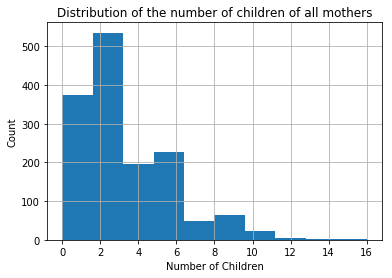

In [7]:
#first looking at the distribution of all number of children
num_child = data['num_child']

plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of the number of children of all mothers")
num_child.hist()

print("Range", (min(num_child), max(num_child)))
print("Mean number of children",num_child.mean())
print("Median number of children", num_child.median())

Next, we will separate our data by the type of contraceptive each mother uses. As a reminder, 
- type 1 = no use of contraceptive
- type 2 = long-term contraceptive
- type 3 = short-term contraceptive

In [8]:
#separate by contraceptive types
type1 = data.loc[data['contraceptive'] == 1]
type2 = data.loc[data['contraceptive'] == 2]
type3 = data.loc[data['contraceptive'] == 3]

### Type 1 Mothers


Range (0, 12)
Mean number of children 2.934817170111288
Median number of children 2.0


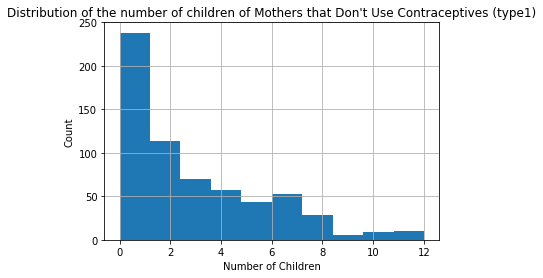

In [9]:
type1Children = type1['num_child']
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of the number of children of Mothers that Don't Use Contraceptives (type1)")
type1Children.hist()

print("Range", (min(type1Children), max(type1Children)))
print("Mean number of children",type1Children.mean())
print("Median number of children", type1Children.median())

### Type 2 Mothers

Range (1, 13)
Mean number of children 3.7387387387387387
Median number of children 3.0


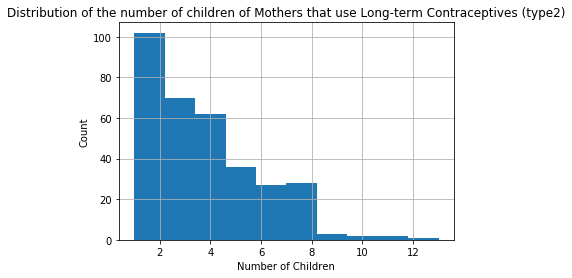

In [10]:
type2Children = type2['num_child']
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of the number of children of Mothers that use Long-term Contraceptives (type2)")
type2Children.hist()

print("Range", (min(type2Children), max(type2Children)))
print("Mean number of children",type2Children.mean())
print("Median number of children", type2Children.median())

### Type 3 Mothers

Range (0, 16)
Mean number of children 3.352250489236791
Median number of children 3.0


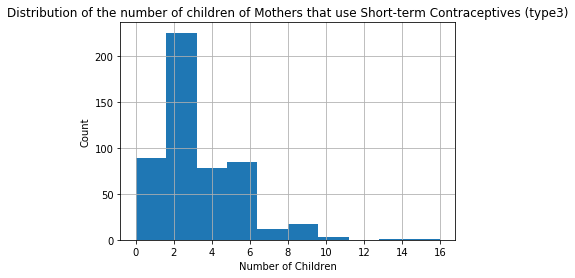

In [11]:
type3Children = type3['num_child']
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of the number of children of Mothers that use Short-term Contraceptives (type3)")
type3Children.hist()

print("Range", (min(type3Children), max(type3Children)))
print("Mean number of children",type3Children.mean())
print("Median number of children", type3Children.median())

### Result

Here is a summary of our findings:
    - Type 1 (no contraceptive Used)
        - Range in (0, 12)
        - Mean number of children 2.93
        - Median number of children 2.0
        - Out of all the types, graph has the highest count of mothers that have 2 or less children
    - Type 2 (Long-term Contraceptive Type)
        - Range (1, 13)
        - Mean number of children 3.74
        - Median number of children 3.0
        - The graph is the most obvious of the three that has a step-type descent. This graph is the clearest in showing there are decreasing counts of type-2 mothers as the number of children increase.
    - Type 3 (Short-term Contraceptive Type)
        - Range (0, 16)
        - Mean number of children 3.35
        - Median number of children 3.0
        - This graph has the largest range of all of the graphs and clear peak at 3 children.

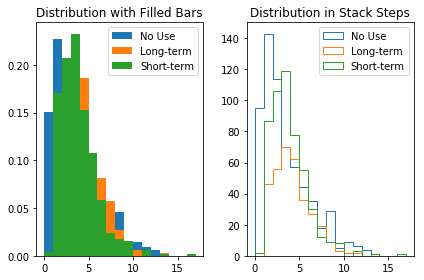

In [12]:
child_bins = range(0, 18)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax2 = axes.flatten()

ax0.hist(type1Children, child_bins, density=True, histtype='bar', label = 'No Use')
ax0.hist(type2Children, child_bins, density=True, histtype='bar', label = 'Long-term')
ax0.hist(type3Children, child_bins, density=True, histtype='bar', label = 'Short-term')
ax0.legend(prop={'size': 10})
ax0.set_title('Distribution with Filled Bars')

ax2.hist(type1Children, child_bins, histtype='step', stacked=True, fill=False, label = 'No Use')
ax2.hist(type2Children, child_bins, histtype='step', stacked=True, fill=False, label = 'Long-term')
ax2.hist(type3Children, child_bins, histtype='step', stacked=True, fill=False, label = 'Short-term')
ax2.legend(prop={'size': 10})
ax2.set_title('Distribution in Stack Steps')

fig.tight_layout()
plt.show()

Surprisingly, the median number of children of mothers that don't use contraceptives is lower than those that use either short-term or long-term contraceptives. This may be due to the larger sample size of mothers that don't use contraceptives at 629 mothers versus mothers that use contraceptives(333 +511).
All of the distributions are heavily right skewed though again, the range of the number of children is largest for mothers that use short-term contraceptives. (0-16)short-term vs (1,13)long-term, and (0,12) no-use. 

### Use of Contraceptive vs No Use

Now, we want to compare mothers that use contraceptive vs those that do not. More specifically, those that do not use contraceptive will fall in the type 1 category with 629 mothers, and those that use contraceptive fall in the type 2 and 3 cateogry with (333 + 511) = 544 mothers.

In [13]:
contraceptiveNoUse = data.loc[data['contraceptive'] == 1]
contraceptiveUse = data.loc[data['contraceptive'] > 1]


Mean number of children for No Use 2.934817170111288
Median number of children for No Use 2.0
Mean number of children for Use 3.504739336492891
Median number of children for Use 3.0


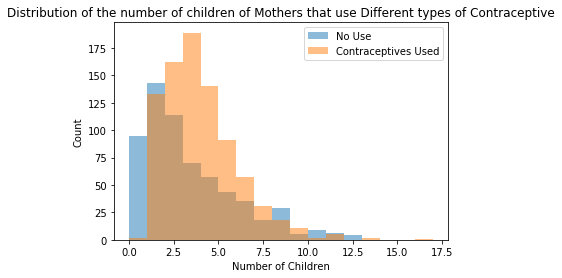

In [55]:
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of the number of children of Mothers that use Different types of Contraceptive")
plt.hist(contraceptiveNoUse['num_child'], bins = child_bins, alpha = 0.5, label = 'No Use')
plt.hist(contraceptiveUse['num_child'], bins = child_bins, alpha = 0.5, label = 'Contraceptives Used')
plt.legend(prop={'size': 10})


print("Mean number of children for No Use", contraceptiveNoUse['num_child'].mean())
print("Median number of children for No Use", contraceptiveNoUse['num_child'].median())

print("Mean number of children for Use", contraceptiveUse['num_child'].mean())
print("Median number of children for Use", contraceptiveUse['num_child'].median())

Interestingly, the distribution of mothers that use contraceptives is more shifted to the right than those that do not use contraceptives. The median of mothers that do not use contraceptives is at 2 children while 3 children for mothers that use contraceptives. This corresponds with our findings from the earlier section. Both distribution are right skewed. Our initial prediction of mothers that use contraceptives relating with lower number of children has been proven incorrect in our sample data.

## Data Transformations

## Can we build a multinomial logistic regression to predict which type of contraceptive method used by an individual given certain variables?

### Select Features

Since we have a mix of categorical and numerical features, we need to seperate them and one hot encode all the categorical features so that our logistic regression model can treat them properly.


In [15]:
features = ["wife_age", "wife_education", "husband_education", "num_child", "wife_religion", "wife_work", "husband_occupation", "standard_living", "media_exposure"]

num_features = ["wife_age", "num_child"]
cat_features = ["wife_education", "husband_education", "wife_religion", "wife_work", "husband_occupation", "standard_living", "media_exposure"]

#features = ["wife_age", "wife_education", "wife_religion", "wife_work"]


response = ["contraceptive"]

### One Hot Encode Categorical Features

Using the OneHotEncoder, all categorical features are one hot encoded and turned into a DataFrame


In [16]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
oh_enc.fit(data[cat_features])
cat_Data = pd.DataFrame(oh_enc.transform(data[cat_features]).todense())

### Merge Numerical and Categorical Features (OHE) 

Numerical and one hot encoded features are merged into a single dataframe that can be passed into the model.


In [17]:
merged = pd.concat([data[num_features], cat_Data], axis = 1)
merged.head()

,wife_age,num_child,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,24,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,45,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,43,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,42,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train-Test Split

Our data is split into training and test sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged, data[response], test_size = 0.20)
print("Training Data Size: ", len(X_train))
print("Test Data Size: ", len(X_test))

Training Data Size:  1178
Test Data Size:  295


## Modeling

In [21]:
def accuracy(given, predicted):
    correct = 0

    for i in range(0, len(given)):
        if given["contraceptive"].iloc[i] == predicted[i]:
            correct += 1
            
    return correct / len(given)

### Logistic Regression Model


#### Creating and Fitting


In [27]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [28]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga',max_iter=100)
#model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Validation

In [30]:
y_fitted = model.predict(X_train)

print("Training data prediction accuracy: %f" % accuracy(y_train, y_fitted))

Training data prediction accuracy: 0.518676


In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores = cross_val_score(model, X_train, y_train, cv = 5)

print("Train data 5 Fold Cross Validation Score for Logistic Regression Model: %f" % np.mean(scores));

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validatio

Train data 5 Fold Cross Validation Score for Logistic Regression Model: 0.507685


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [33]:
y_pred = model.predict(X_test)

print("Test data prediction accuracy: %f" % accuracy(y_test, y_pred))

Test data prediction accuracy: 0.532203


### Random Forest Model

#### Creating and Fitting


In [34]:
#Recreate date without OHE

X_train, X_test, y_train, y_test = train_test_split(data[features], data[response], test_size = 0.20)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [36]:
forest = RandomForestClassifier()

In [37]:
forest.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Model Validation

In [38]:
y_fitted = forest.predict(X_train)

print("Training data prediction accuracy: %f" % accuracy(y_train, y_fitted))



Training data prediction accuracy: 0.946520


In [39]:
scores = cross_val_score(forest, X_train, y_train, cv = 5)

print("Train data 5 Fold Cross Validation Score for Random Forest Classifier: %f" % np.mean(scores))


Train data 5 Fold Cross Validation Score for Random Forest Classifier: 0.502528


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

In [40]:
y_pred = forest.predict(X_test)

print("Test data prediction accuracy: %f" % accuracy(y_test, y_pred))

Test data prediction accuracy: 0.522034


### Results

Summary of Model Results

| Model         | Training Set Accuracy | Cross Validation Score | Testing Set Accuracy |
|---------------|-----------------------|------------------------|----------------------|
| Logistic     | 0.529711              | 0.495756               | 0.525424             |
| Random Forest | 0.941426              | 0.521324               | 0.494915             |

#### Logistic Regression Evaluation

Training accuracy, Cross Validation and Testing Accuracy are all within a few percentage points of each other, suggesting that our model has reached the point where if we add more features we may go into the terratory of overfitting. Although the accuracy is pretty low at 50%, since we are choosing between 3 categories, the random chance of guessing the right contraceptive category for a mother is 33%, while our model predicts on test data with 52%. Since we used all the features we had available in this model, we want to see what single feature or set of features can do better than using all our features.

#### Random Forest Evaluation

Training accuracy is significantly higher than Cross Validation and Testing Accuracy suggesting that our model has been overfit to our data, a drawback of descision trees in general but we  had hoped the effect of which would have been reduced by using a Random Forest. This draws us to the conclusion that the Random Forest, although it has overfit our training data, does not perform significantly worse than our Logistic Regression model, sitting just shy of 50% accuracy, still above the 33% accuracy achieved by randomly guessing what contraceptive type a mother uses. 


## Data Cleaning

In [43]:
oh_enc = OneHotEncoder()

arr = []
for age in data['wife_age']:
    if age <= 20:
        arr.append(1)
    elif age > 20 and age <= 30:
        arr.append(2)
    elif age > 30 and age <= 40:
        arr.append(3)
    elif age > 40 and age <= 50:
        arr.append(4)
    
data['age_category'] = arr

In [44]:
arr_child = []
for age in data['num_child']:
    if age == 0:
        arr_child.append(1)
    elif age > 0 and age <= 2:
        arr_child.append(2)
    elif age > 2 and age <= 5:
        arr_child.append(3)
    elif age > 5 and age <= 8:
        arr_child.append(4)
    elif age > 8 and age <= 12:
        arr_child.append(5)
    else:
        arr_child.append(6)
    
data['num_child_category'] = arr_child

In [45]:
## Data Transformations

In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.20, random_state=42)
print(len(train))
print(len(test))

1178
295


In [49]:
# All in loop

for col in data:
    
    if (col == 'wife_age' or col == 'num_child'):
        continue
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(train[[col]])
#     oh_enc.get_feature_names()
    X_train = oh_enc.transform(train[[col]]).todense()
    Y_train = train["contraceptive"]

    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression(solver='lbfgs', C=1e5)
    model.fit(X_train, Y_train)
    
    X_test = oh_enc.transform(test[[col]]).todense()
    Y_test = test['contraceptive']
    
    print(col, model.score(X_test, Y_test))

wife_education 0.43728813559322033
husband_education 0.4406779661016949
wife_religion 0.43389830508474575
wife_work 0.4406779661016949
husband_occupation 0.4406779661016949
standard_living 0.4406779661016949
media_exposure 0.4406779661016949
contraceptive 1.0
num_child_category 0.4915254237288136
age_category 0.41694915254237286


In [52]:
oh_enc = OneHotEncoder()
cols = ['wife_education', 'husband_education', 'wife_religion', 'husband_occupation']

oh_enc.fit(train[cols])
X_train = oh_enc.transform(train[cols]).todense()
Y_train = train["contraceptive"]
print(X_train)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', C=1e5)
model.fit(X_train, Y_train)

X_test = oh_enc.transform(test[cols]).todense()
Y_test = test['contraceptive']

print(model.score(X_train, Y_train))

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.4694397283531409


In [53]:
cols = ['wife_education', 'husband_education', 'husband_occupation', 'age_category', 'num_child_category']

oh_enc.fit(train[cols])
X_train = oh_enc.transform(train[cols]).todense()
Y_train = train["contraceptive"]
print(X_train)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs',  C=1e5)
model.fit(X_train, Y_train)

X_test = oh_enc.transform(test[cols]).todense()
Y_test = test['contraceptive']

print(model.score(X_test, Y_test))

[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.5525423728813559
